In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

# Simple LUME-Astra example

In [2]:
from astra import Astra

In [3]:
# Make an Astra object
A = Astra(input_file='../templates/dcgun/astra.in')

In [4]:
# Change some inputs
A.input['newrun']['zemit']  = 1000
A.input['newrun']['zphase'] = 20
A.input['newrun']['phases'] = True
A.input['output']['zstop']  = 1

# Special flags
A.timeout = None
A.verbose = True

In [5]:
# Run
A.run()

Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/generator.part to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpvxngoo53/generator.part
Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpvxngoo53/dcgun_GHV.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/solenoid_SLA_L60.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpvxngoo53/solenoid_SLA_L60.dat
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                            Version 3.0              
                        DESY,  Hamburg 2011          
                        Sun Aug  9 07:46:05 

     Parameter file is:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/t
     astra input file for L0 injector (20070501_1)                                   

 Initialize element settings:
     neglecting space charge forces

In [6]:
# Output is automatically parsed into a .output dict
A.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

In [7]:
# These are the statistics from Astra's Xemit style files
A.output['stats'].keys()

dict_keys(['mean_z', 'mean_t', 'mean_x', 'sigma_x', 'sigma_xp', 'norm_emit_x', 'cov_x__xp', 'mean_y', 'sigma_y', 'sigma_yp', 'norm_emit_y', 'cov_y__yp', 'mean_kinetic_energy', 'sigma_z', 'sigma_energy', 'norm_emit_z', 'cov_z__energy'])

In [8]:
# Some simple run info
A.output['run_info']

{'start_time': 1596984365.115791,
 'run_script': '/Users/chrisonian/Code/astra/bin/Astra /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpvxngoo53/astra.in',
 'run_time': 2.293950080871582,
 'run_error': False}

In [9]:
# Other data, such as from the LandF file, are stored here
A.output['other']

{'landf_z': array([0.      , 0.049975, 0.1     , 0.15    , 0.2     , 0.25    ,
        0.3     , 0.35    , 0.4     , 0.45    , 0.5     , 0.55    ,
        0.6     , 0.65    , 0.7     , 0.75    , 0.8     , 0.85    ,
        0.9     , 0.95    , 1.      ]),
 'landf_n_particles': array([2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000.]),
 'landf_total_charge': array([-0.e+00,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10]),
 'landf_n_lost': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_deposited': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_exchange': array([ 0.0000e+00,  4.4737e-05,  5.2282e-

In [10]:
# This is the path that work was done. By default, this will be automatically cleaned up.
A.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpvxngoo53'

# Plotting

The Astra object has built in plotting. The defaults will plot the beam sizes as lines, data calculated from particles as dots, and the fieldmaps.

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/solenoid_SLA_L60.dat


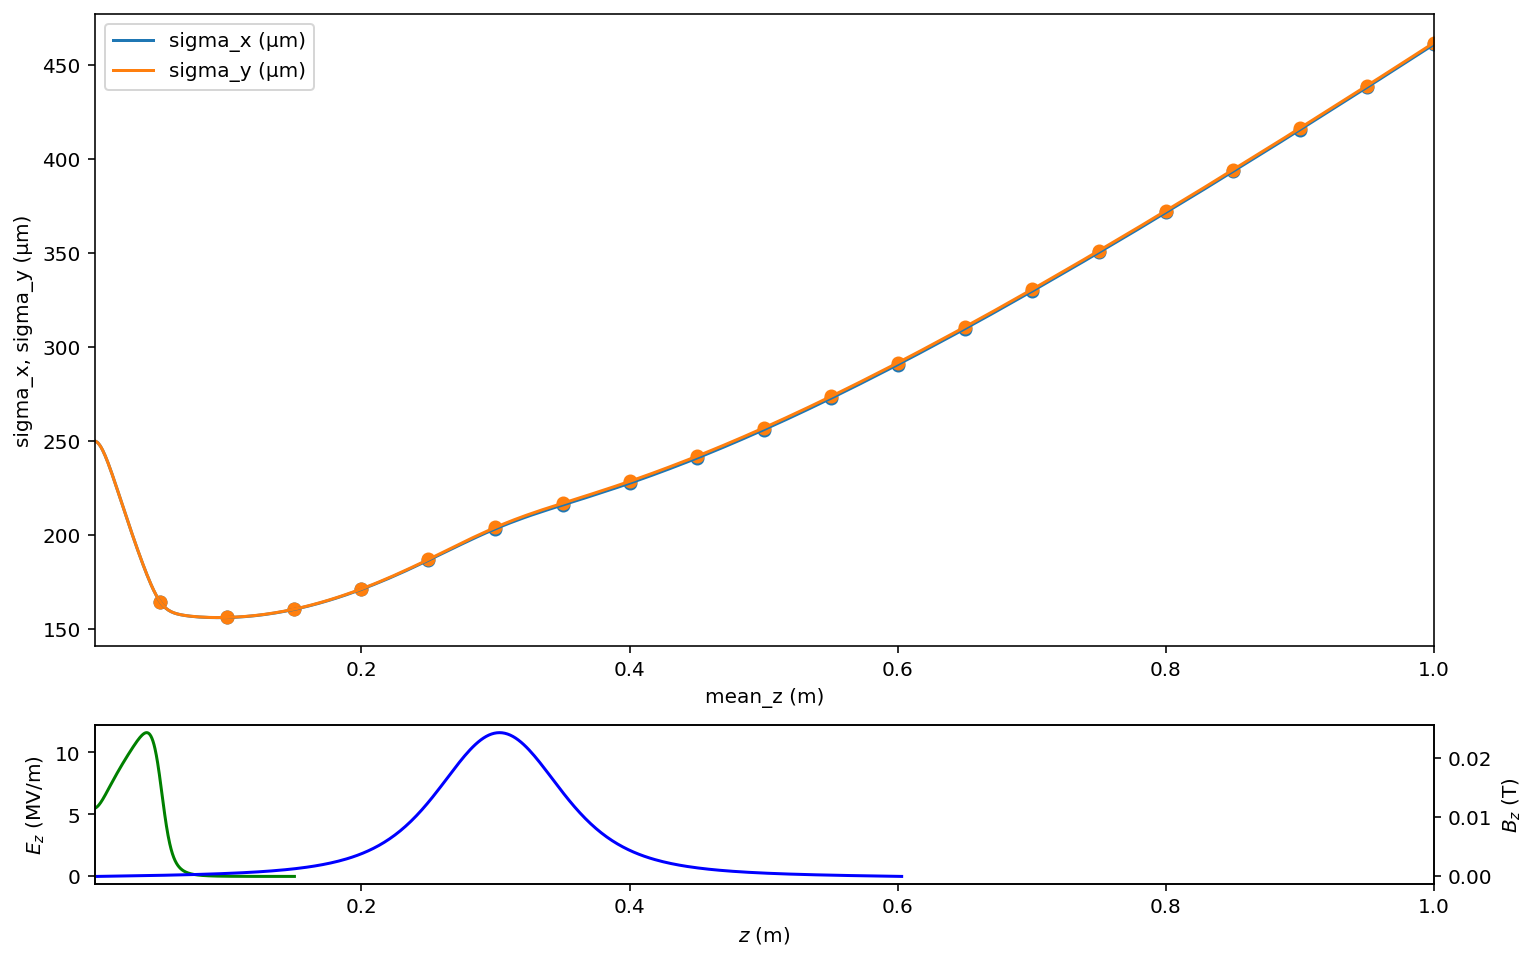

In [11]:
A.plot()

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/solenoid_SLA_L60.dat


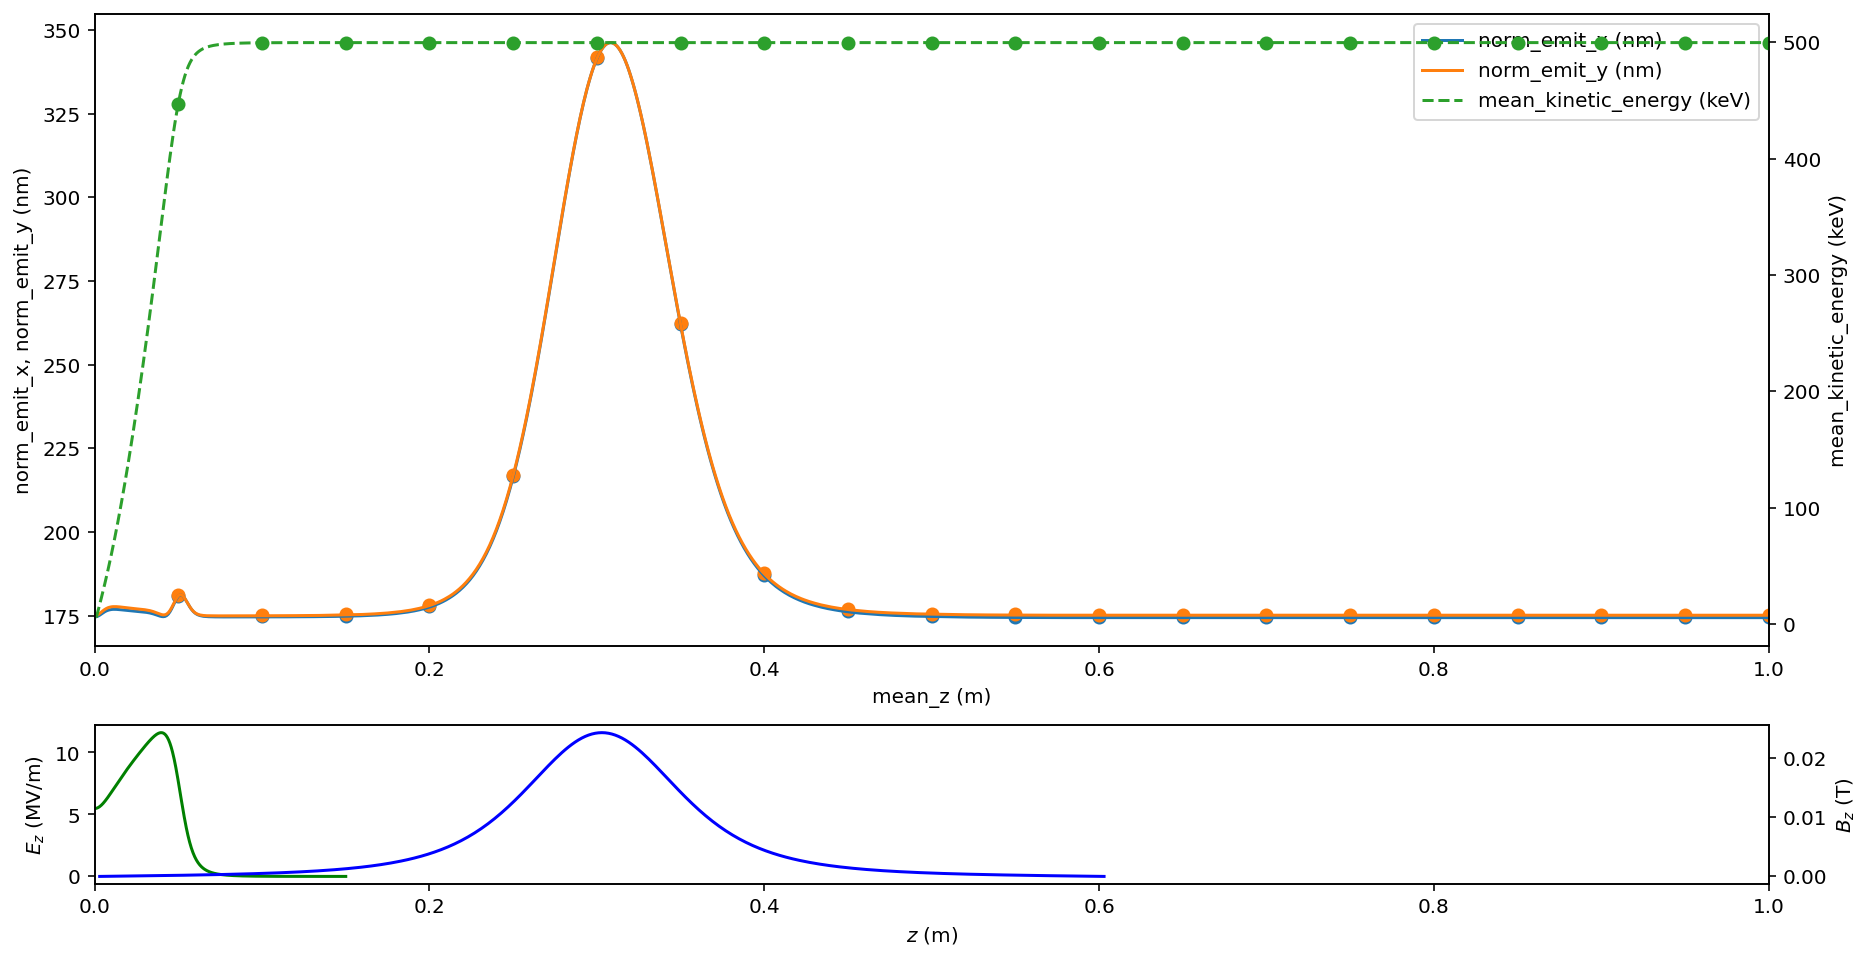

In [12]:
# Fancier options
A.plot(['norm_emit_x', 'norm_emit_y'], y2='mean_kinetic_energy', xlim = (0, 1), figsize=(15,8) )

# Particles 

In [13]:
# Particles are automatically parsed in to openpmd-beamphysics ParticleGroup objects
A.output['particles']

[<ParticleGroup with 1999 particles at 0x7f8cdc835210>,
 <ParticleGroup with 1999 particles at 0x7f8ce11bd290>,
 <ParticleGroup with 1999 particles at 0x7f8ce108bd10>,
 <ParticleGroup with 1999 particles at 0x7f8ce11bd210>,
 <ParticleGroup with 1999 particles at 0x7f8ce1098a50>,
 <ParticleGroup with 1999 particles at 0x7f8cdc835110>,
 <ParticleGroup with 1999 particles at 0x7f8ce01f8f50>,
 <ParticleGroup with 1999 particles at 0x7f8ce1098c90>,
 <ParticleGroup with 1999 particles at 0x7f8cdc835690>,
 <ParticleGroup with 1999 particles at 0x7f8ce108b8d0>,
 <ParticleGroup with 1999 particles at 0x7f8ce1042810>,
 <ParticleGroup with 1999 particles at 0x7f8ce02036d0>,
 <ParticleGroup with 1999 particles at 0x7f8ce10c7490>,
 <ParticleGroup with 1999 particles at 0x7f8ce11bd250>,
 <ParticleGroup with 1999 particles at 0x7f8ce10c7410>,
 <ParticleGroup with 1999 particles at 0x7f8ce1098cd0>,
 <ParticleGroup with 1999 particles at 0x7f8ce10983d0>,
 <ParticleGroup with 1999 particles at 0x7f8cde1

In [14]:
# Get the last item, and request some statistic

# A.particles points to A.output['particles'] for convenience 
P = A.particles[-1]

P['mean_energy']

1010791.4018127844

In [15]:
# Show the units
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

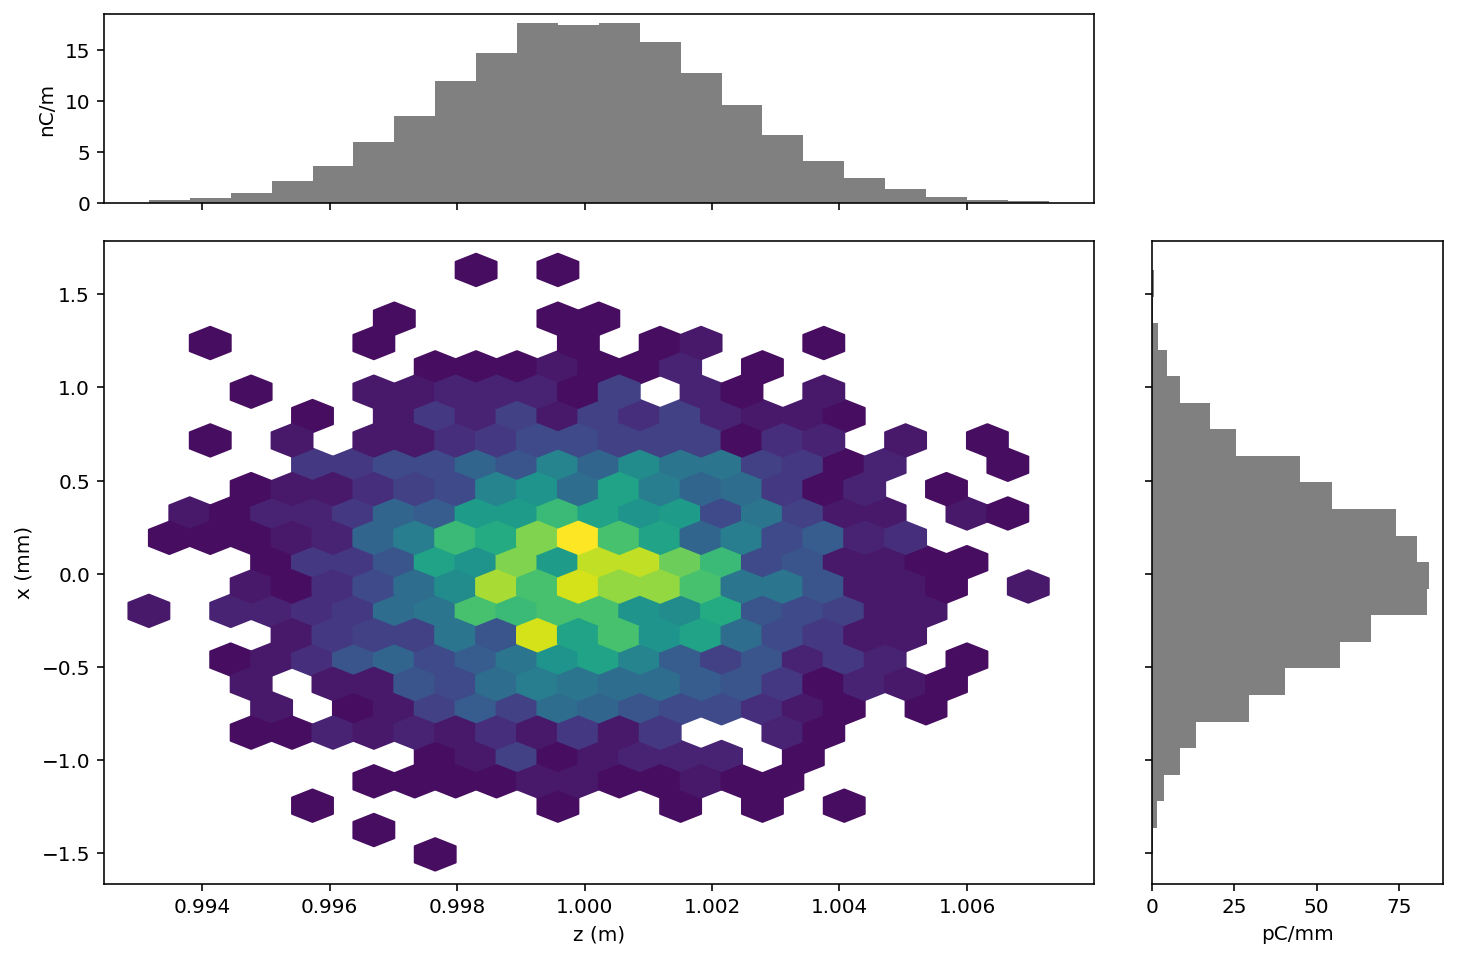

In [16]:
# This provides easy ploting
P.plot('z', 'x')

[]

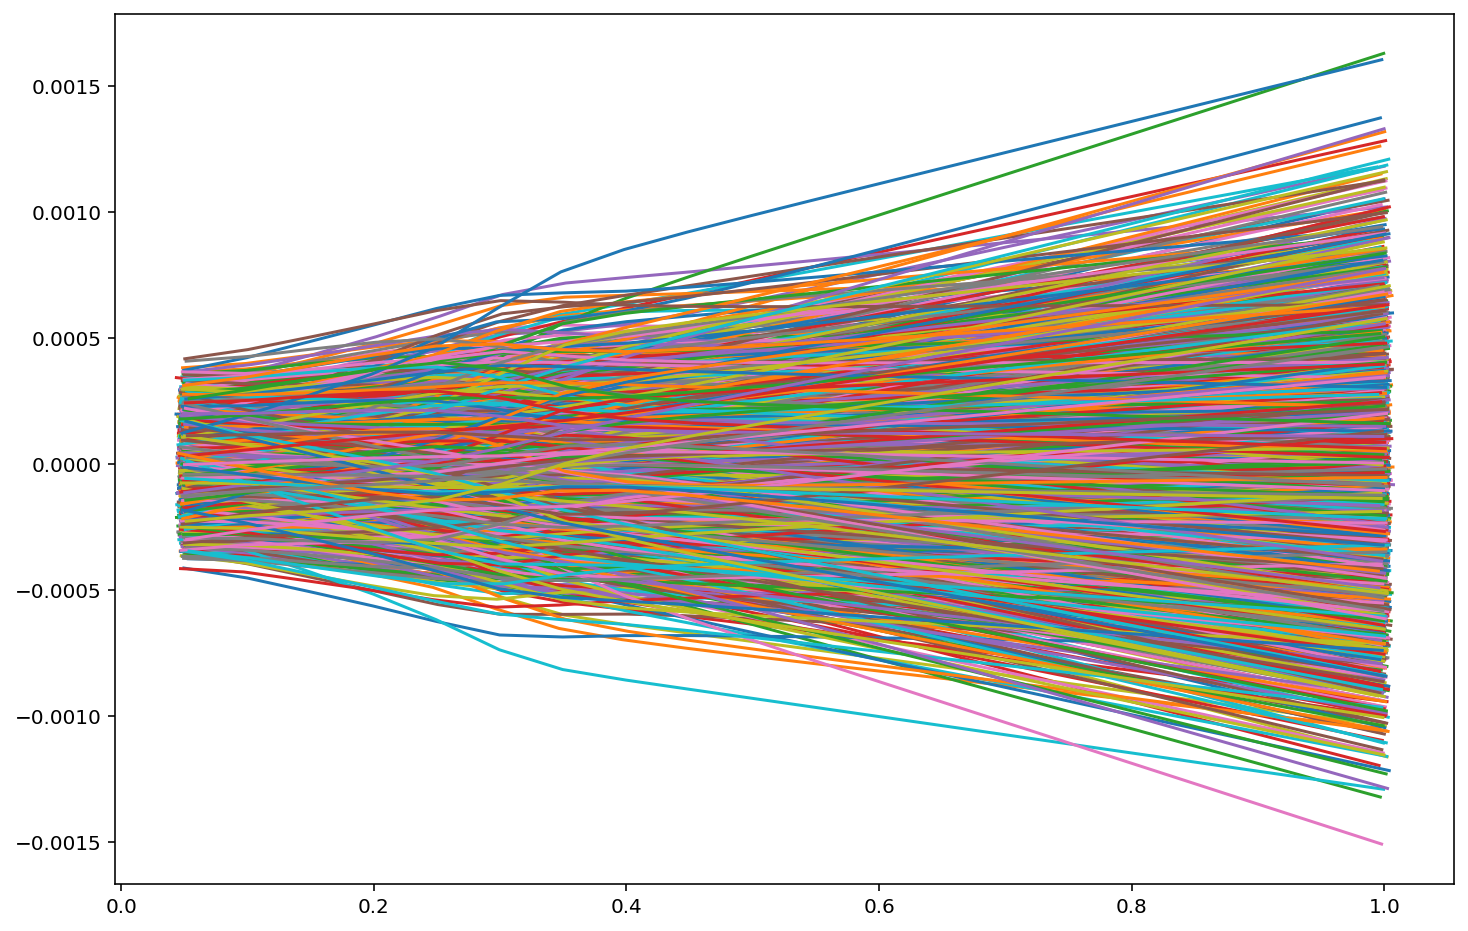

In [17]:
# Traces can be made by gathering the coordinate arrays
plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

[]

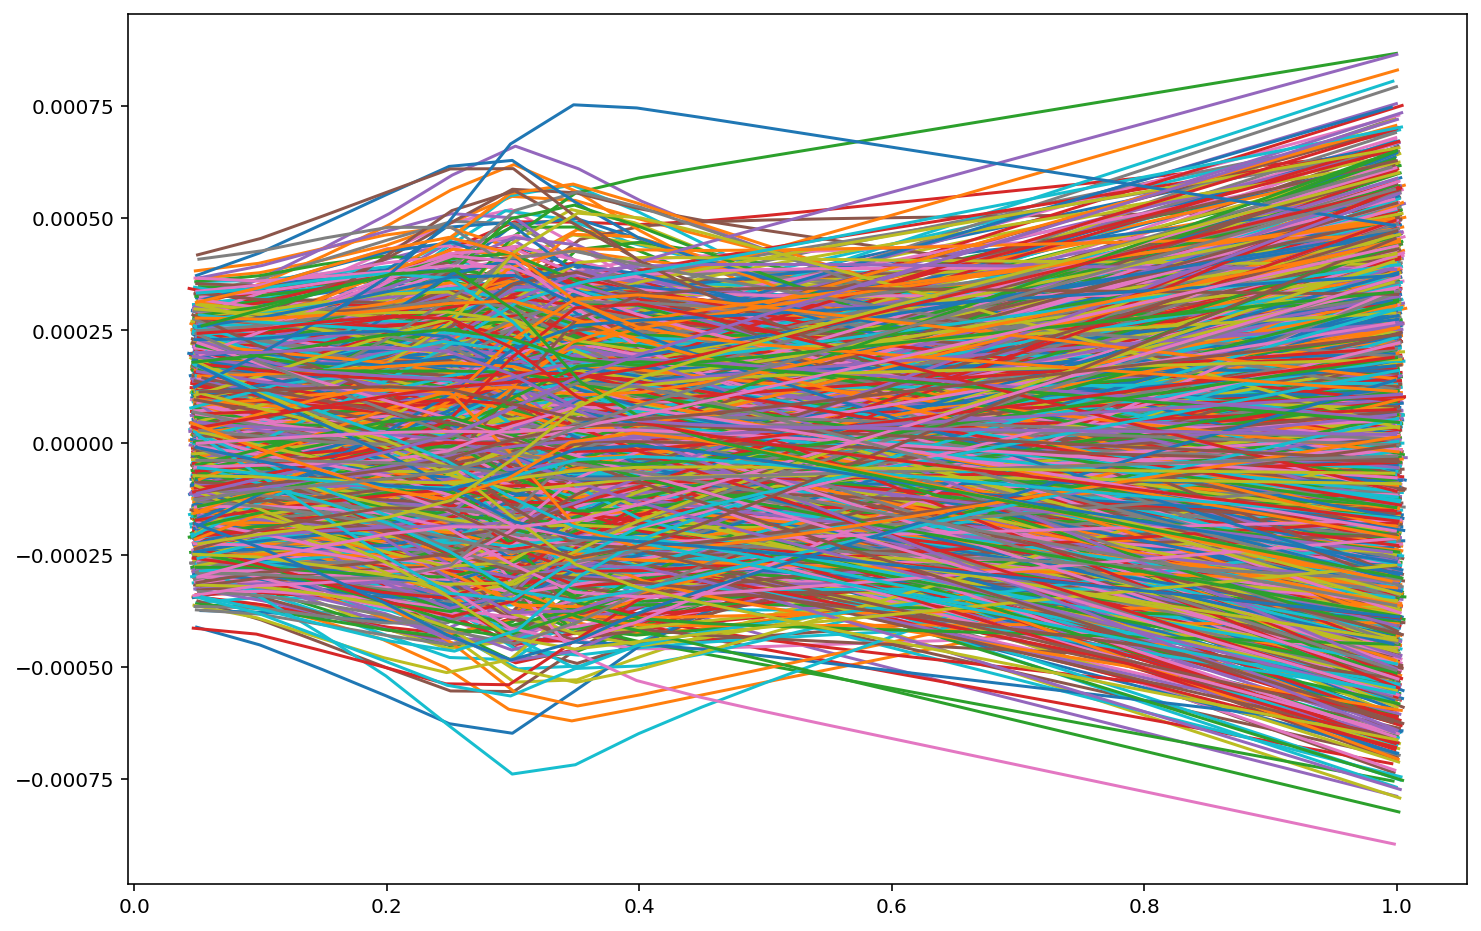

In [18]:
# Change something, run, and plot again

A.input['solenoid']['maxb(1)'] = 0.04
A.input['charge']['lspch'] =False
A.verbose=False
A.run()

# Traces can be made by gathering the coordinate arrays
plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

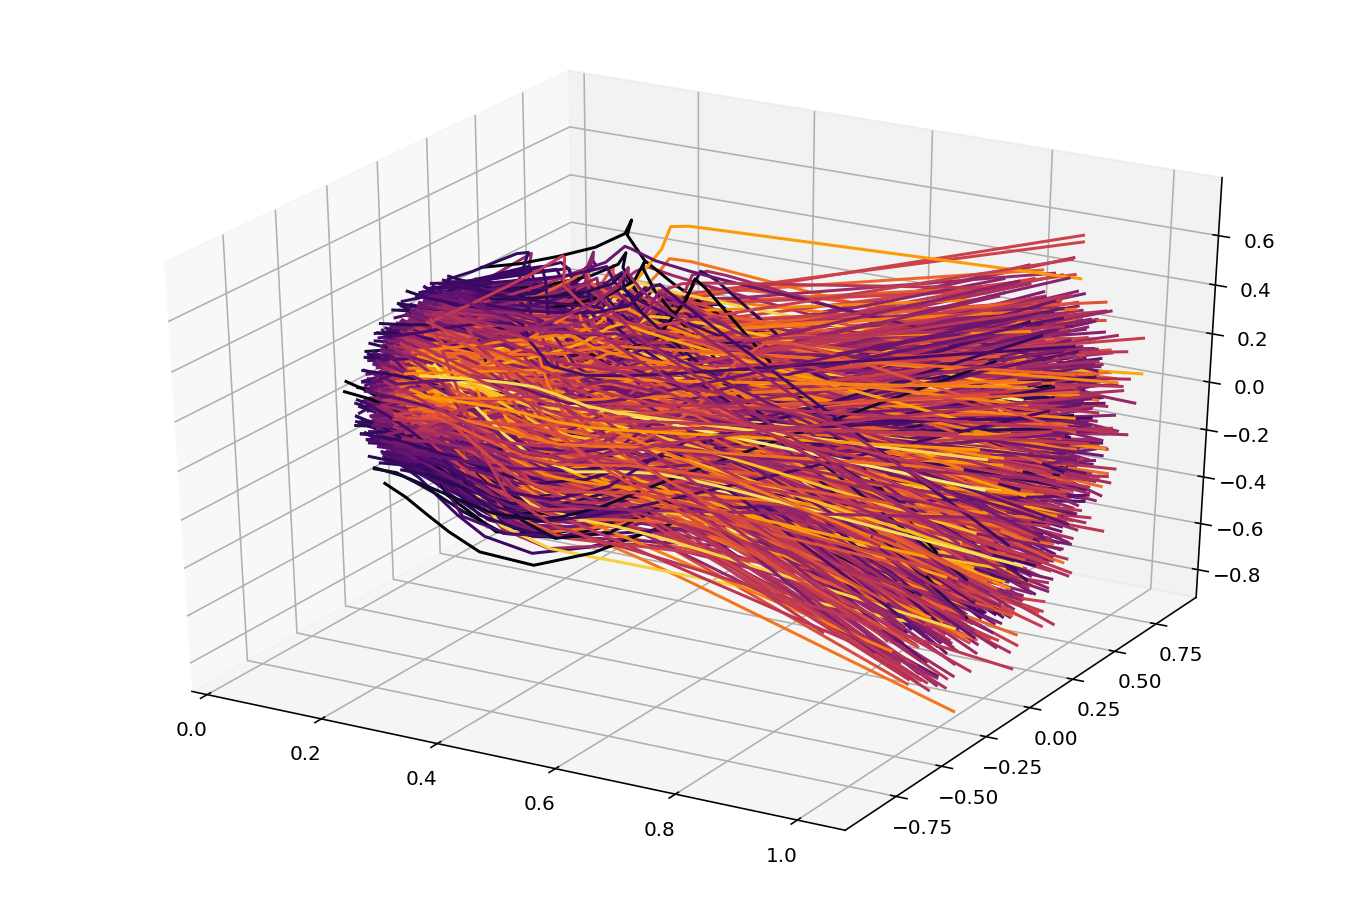

In [19]:
# 3D plot
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = matplotlib.cm.get_cmap('inferno')

X = np.array([P.x for P in  A.particles]).T
Y = np.array([P.y for P in  A.particles]).T
Z = np.array([P.z for P in  A.particles]).T

scale = np.hypot(X[:, 0], Y[:,0]).max()

for i in range(len(X)):
    color = cmap(1-np.hypot(X[i,0], Y[i,0])/scale)
    ax.plot(X[i]*1000, Y[i]*1000, Z[i], zdir='x', color=color)


# Stats

Astra computes statistics in several output tables


In [20]:
# Astra's own calculated statistics can be retieved
len(A.stat('norm_emit_x')), A.stat('norm_emit_x')[-1]

(999, 1.7458e-07)

In [21]:
# Statistics can be calculated directly from the particles
A.particle_stat('norm_emit_x')

array([1.81468749e-07, 1.75285393e-07, 1.75882138e-07, 1.83314665e-07,
       2.74161838e-07, 4.91320089e-07, 3.13178319e-07, 1.89493985e-07,
       1.76465214e-07, 1.75297891e-07, 1.75144984e-07, 1.75126206e-07,
       1.75127277e-07, 1.75127277e-07, 1.75127277e-07, 1.75127277e-07,
       1.75127277e-07, 1.75127277e-07, 1.75127277e-07, 1.75127277e-07])

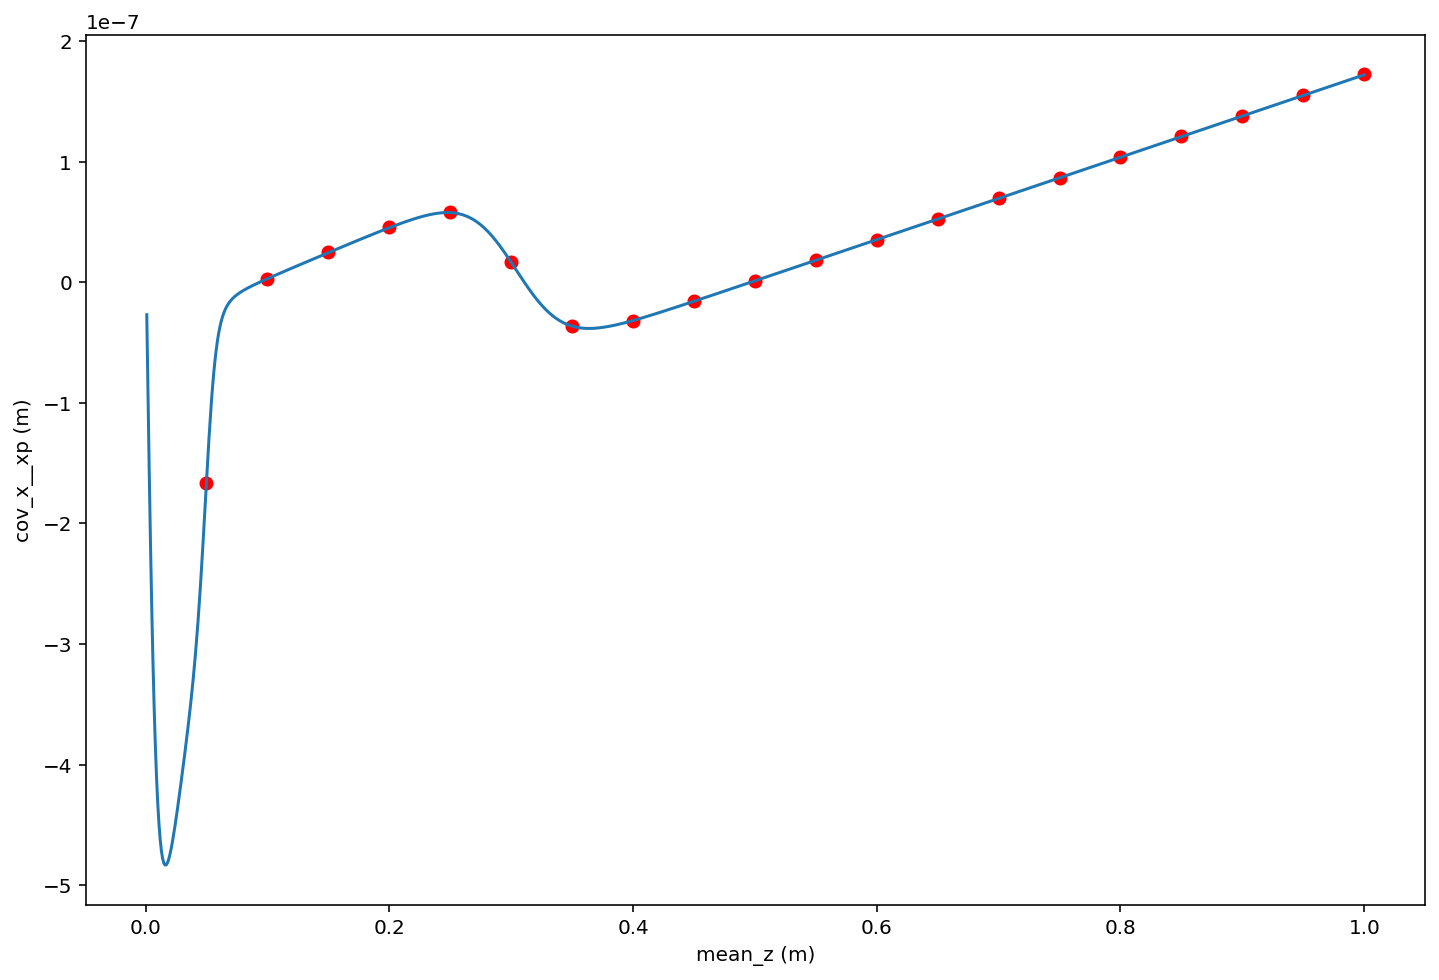

In [22]:
# Compare these. 
key1 = 'mean_z'
key2 = 'cov_x__xp'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2))
plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

# Load previously computed run

If Astra was executed manually, and the output files exist along side the input, the Astra object can load them

In [23]:
A2 = Astra(input_file=A.input_file, use_tempdir = False )
A2.load_output()
A2.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

# Archive all output

All of .input and .output can be archived and loaded from standard h5 files.

Particles are stored in the openPMD-beamphysics format.

In [24]:
H5FILE='astra.h5'

In [25]:
A.archive(H5FILE)

'astra.h5'

In [26]:
# If no file is given, a filename will be invented based on the fingerprint
H5FILE2 = A.archive()

In [28]:
#These can be loaded into completely empty objects
A3 = Astra.from_archive(H5FILE2)

# Check that the fingerprints are the same
A3.fingerprint() == A.fingerprint()

True

In [29]:
# Spot check that the loaded data is the same as the original
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

In [30]:
# Re-configure to set up working dir and run again
A3.configure()
A3.run()

# Check stat again
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

# Reading archived files manually

In [31]:
from h5py import File

In [32]:
# Let's open one of these files
h5 = File(H5FILE, 'r')

# Basic input and output groups are at the top level
list(h5)

['input', 'output']

In [33]:
# Input corresponds to the Asta namelist inputs
list(h5['input'])

['aperture',
 'cavity',
 'charge',
 'fem',
 'newrun',
 'output',
 'quadrupole',
 'scan',
 'solenoid']

In [34]:
# The actual values are in attrs. Retrieve them by casting to a dict
dict(h5['input']['newrun'].attrs)

{'auto_phase': True,
 'cathodes': False,
 'distribution': '/Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/generator.part',
 'emits': True,
 'h_max': 0.002,
 'h_min': 0.0002,
 'head': "'astra input file for L0 injector (20070501_1)'",
 'landfs': True,
 'larmors': False,
 'lmagnetized': True,
 'loop': False,
 'lproject_emit': False,
 'phase_scan': False,
 'phases': True,
 'refs': False,
 'run': 1,
 'screen': array([1.1, 2.2]),
 't_phases': False,
 'tchecks': False,
 'track_all': True,
 'tracks': False,
 'zemit': 1000,
 'zphase': 20,
 'zstart': 0,
 'zstop': 1}

In [35]:
# Output containts datasets
list(h5['output'])

['other', 'particles', 'stats']

In [36]:
# Example dataset
h5['output']['stats']['norm_emit_x'][-1]

1.7458e-07

In [37]:
# unit information is stored in the attributes
dict(h5['output']['stats']['norm_emit_x'].attrs)

{'unitDimension': array([1, 0, 0, 0, 0, 0, 0]), 'unitSI': 1, 'unitSymbol': 'm'}

In [38]:
# These can be read in with the units using a helper function

from pmd_beamphysics.units import read_dataset_and_unit_h5

dat, unit = read_dataset_and_unit_h5(h5['output']['stats']['norm_emit_x'])
unit

pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0))

In [39]:
# Particles are stored in the openPMD-beamphysics standard.
list(h5['output']['particles']['0'])

['momentum', 'particleStatus', 'position', 'time', 'weight']

In [40]:
# These can be read in as a ParticleGroup object. This is the same type of object that A.particles is kept as.
from pmd_beamphysics import ParticleGroup
P = ParticleGroup(h5['output']['particles']['0'])
P['norm_emit_x']

1.810648448311773e-07

In [41]:
# Cleanup
import os

os.remove(H5FILE)
os.remove(H5FILE2)